In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

sns.set_theme()

# LAB2

## STEP 1

In [2]:
df = pd.read_csv('Documentation/lab2_data.csv', )
df

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance
0,1,Motorcycle,0.0,0.000
1,1,Motorcycle,0.4,0.000
2,1,Motorcycle,0.8,0.000
3,1,Motorcycle,1.2,0.000
4,1,Motorcycle,1.6,0.000
...,...,...,...,...
580205,2476,Car,952.8,11.846
580206,2477,Car,951.6,0.000
580207,2477,Car,952.0,3.387
580208,2477,Car,952.4,6.944


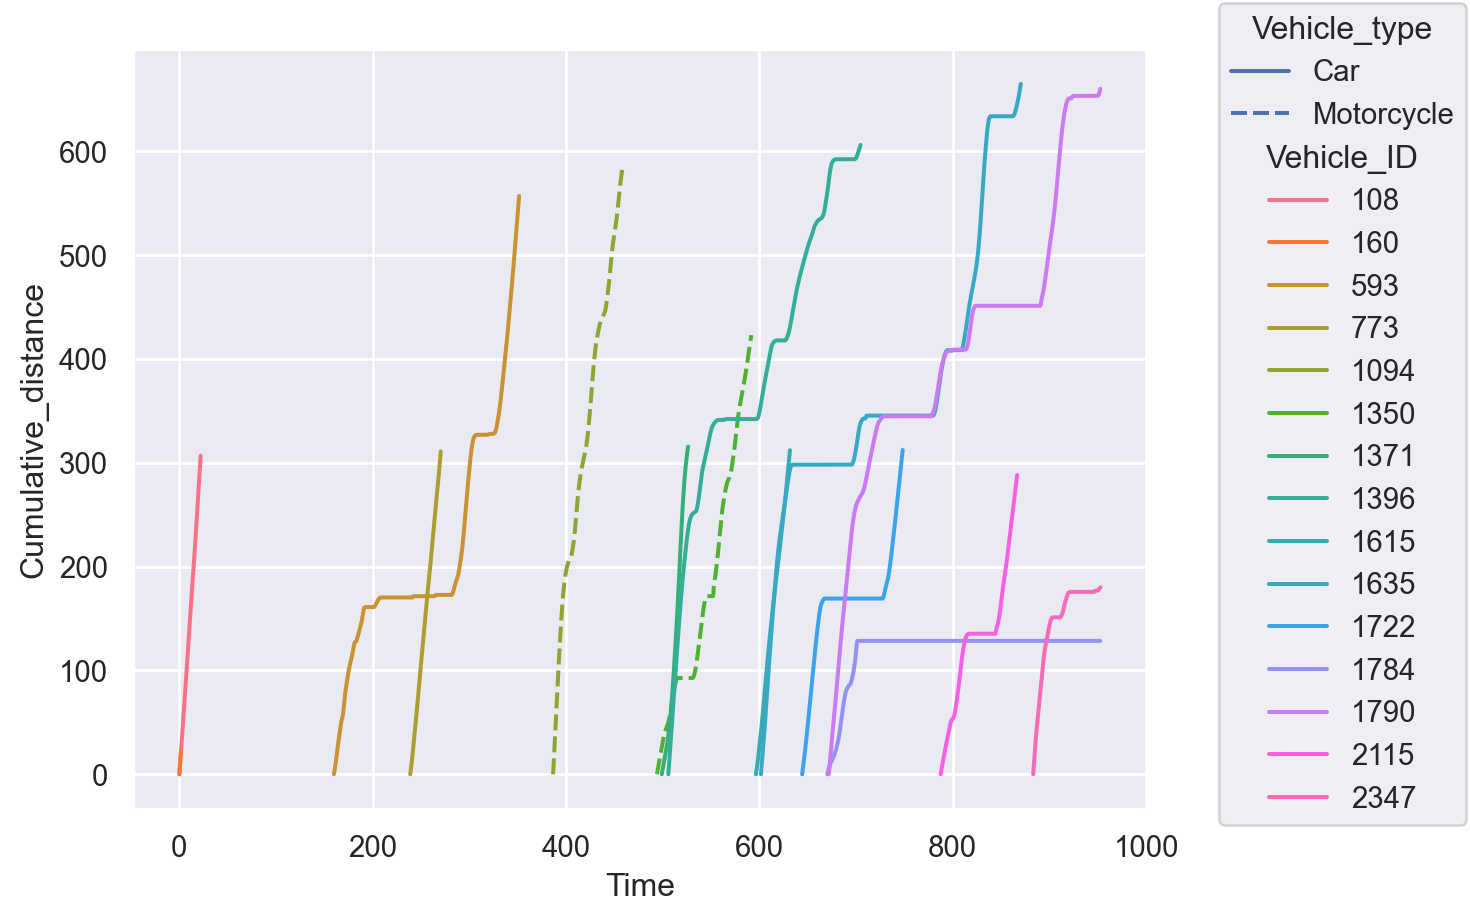

In [3]:
#print plot of a sample of 15 cars to visualise the data

sample = np.random.choice(df.Vehicle_ID.unique(),15)
(
    so.Plot(df.loc[df.Vehicle_ID.isin(sample)], x="Time", y="Cumulative_distance", linestyle="Vehicle_type", color="Vehicle_ID")
    .add(so.Line())
    .scale(color=so.Nominal())
    .save('Graphs/T1_samples_of_data.png')
    .plot()
)

In [4]:
#Create distance, speed and acceleration in function of time
df["distance"] = df.groupby("Vehicle_ID")["Cumulative_distance"].diff()
df["dt"] = df.groupby("Vehicle_ID")["Time"].diff()
df["speed"] = df.distance / df.dt
df["acceleration"] = df.speed.diff() / df.dt

df

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance,distance,dt,speed,acceleration
0,1,Motorcycle,0.0,0.000,NaN,NaN,NaN,NaN
1,1,Motorcycle,0.4,0.000,0.000,0.4,0.0000,NaN
2,1,Motorcycle,0.8,0.000,0.000,0.4,0.0000,0.00000
3,1,Motorcycle,1.2,0.000,0.000,0.4,0.0000,0.00000
4,1,Motorcycle,1.6,0.000,0.000,0.4,0.0000,0.00000
...,...,...,...,...,...,...,...,...
580205,2476,Car,952.8,11.846,2.524,0.4,6.3100,-2.85625
580206,2477,Car,951.6,0.000,NaN,NaN,NaN,NaN
580207,2477,Car,952.0,3.387,3.387,0.4,8.4675,NaN
580208,2477,Car,952.4,6.944,3.557,0.4,8.8925,1.06250


### Checking the data

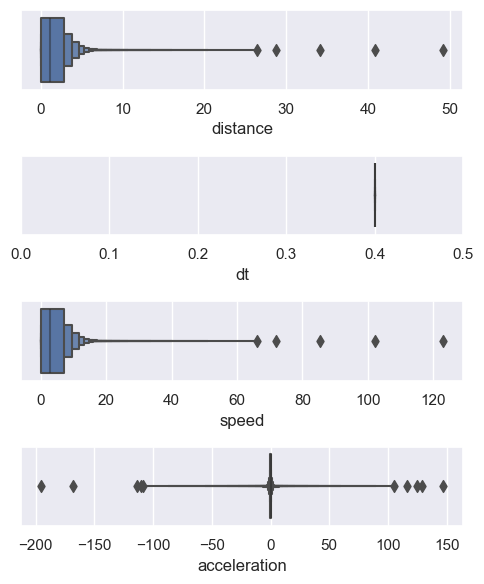

In [5]:
# Visualise the data to check if it makes sense :

plt.figure(figsize=(5,6), layout="tight")
for i, var in enumerate(["distance", "dt", "speed", "acceleration"]) :
    plt.subplot(4,1,i+1)
    sns.boxenplot(x=df[var])
    if var=="dt":
        plt.xlim(left=0, right=0.5)

plt.show()

But the speed is in m/s ! Let's check if the values  make sense in km/h :

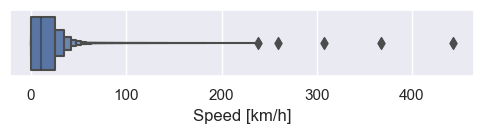

In [6]:
#Defining an utility :
kmh = lambda x,*k : x*3.6  # noqa: E731

# Redo the speed boxplot in km/h
plt.figure(figsize=(5,6/4), layout="tight")
sns.boxenplot(x=kmh(df["speed"]))
plt.xlabel("Speed [km/h]")
plt.show()

Whooooo ! That seems too fast. Probably some glitches in the data. Let's try to correct that by computing the speed over a bigger interval ? Like for example over 3 intervals :

In [7]:
rolling = df.groupby("Vehicle_ID").rolling(window=3, center=True)
speed_corrected = (rolling.distance.sum() / rolling.dt.sum()).droplevel(0).rename("Corrected speed")

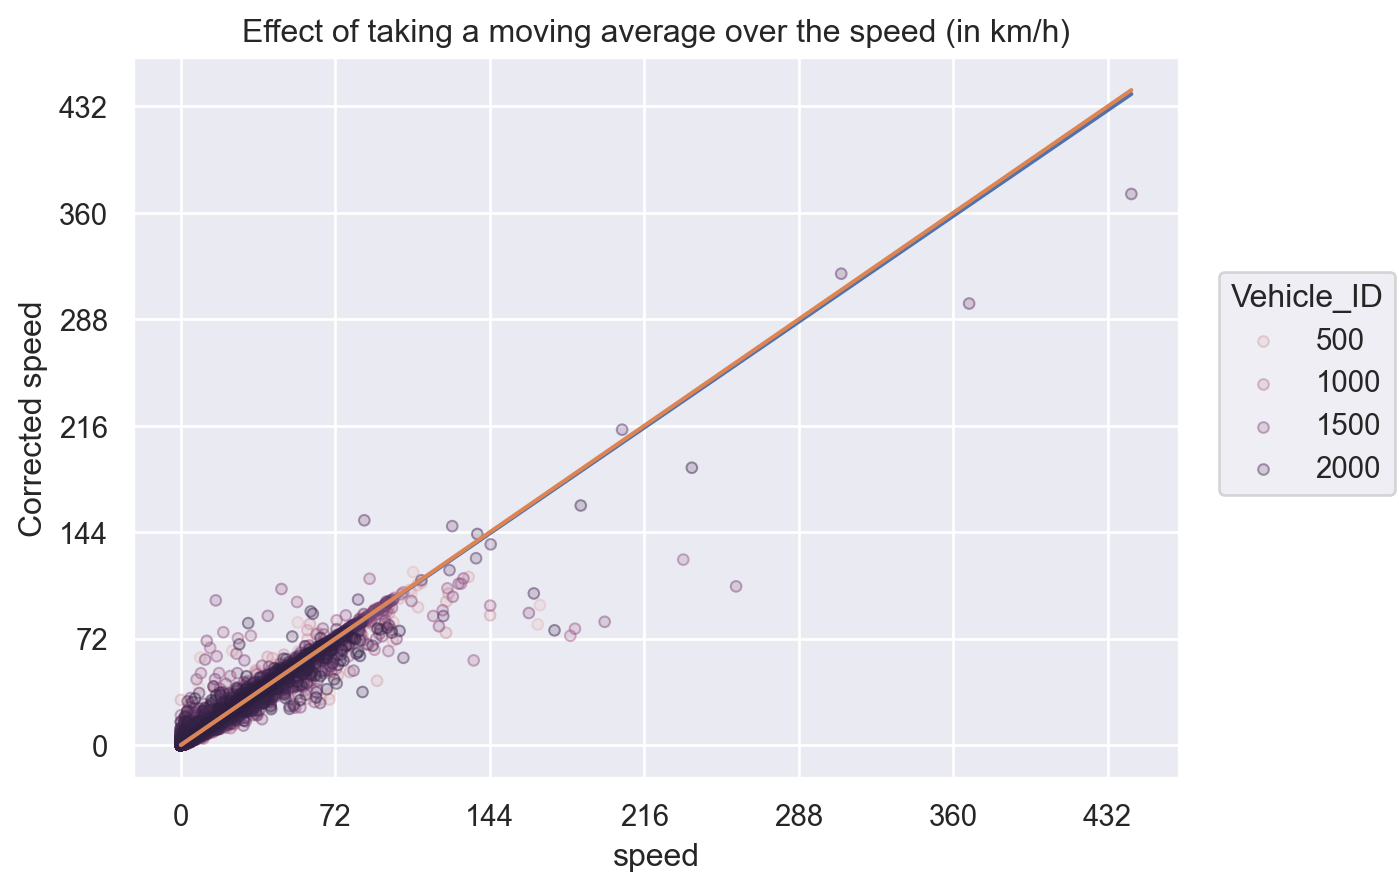

In [8]:
#Visualise the results
(
    so.Plot(data=df, x="speed", y=speed_corrected)
    .add(so.Dots(alpha=0.5), color="Vehicle_ID")
    .add(so.Line(),so.PolyFit(1))
    .add(so.Line(color="C1"), y="speed")
    .scale(x=so.Continuous().label(like=lambda x, pos: f"{kmh(x):.0f}"), y=so.Continuous().label(like=lambda x, pos: f"{kmh(x):.0f}"), color=so.Continuous())
    .label(title = "Effect of taking a moving average over the speed (in km/h)")
    .plot()
)

This does not help. Let's look at the data where speed is bigger than 150 km/h :

In [9]:
df.loc[df.speed>150/3.6]

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance,distance,dt,speed,acceleration
53407,239,Car,161.0,380.718,17.611,0.4,44.0275,34.89375
55113,245,Motorcycle,13.0,34.367,18.599,0.4,46.4975,41.52500
55117,245,Motorcycle,14.6,56.630,18.481,0.4,46.2025,98.86250
310348,1221,Heavy Vehicle,446.8,57.074,20.170,0.4,50.4250,116.57500
347736,1361,Motorcycle,525.4,60.020,20.411,0.4,51.0275,104.91250
355599,1393,Car,548.6,51.005,26.021,0.4,65.0525,125.03125
407436,1581,Car,619.8,58.601,21.948,0.4,54.8700,128.78750
413834,1609,Car,622.6,49.972,18.023,0.4,45.0575,104.78750
415838,1616,Car,626.4,63.863,28.756,0.4,71.8900,147.16250
501431,1980,Motorcycle,822.2,633.203,22.852,0.4,57.1300,54.98750


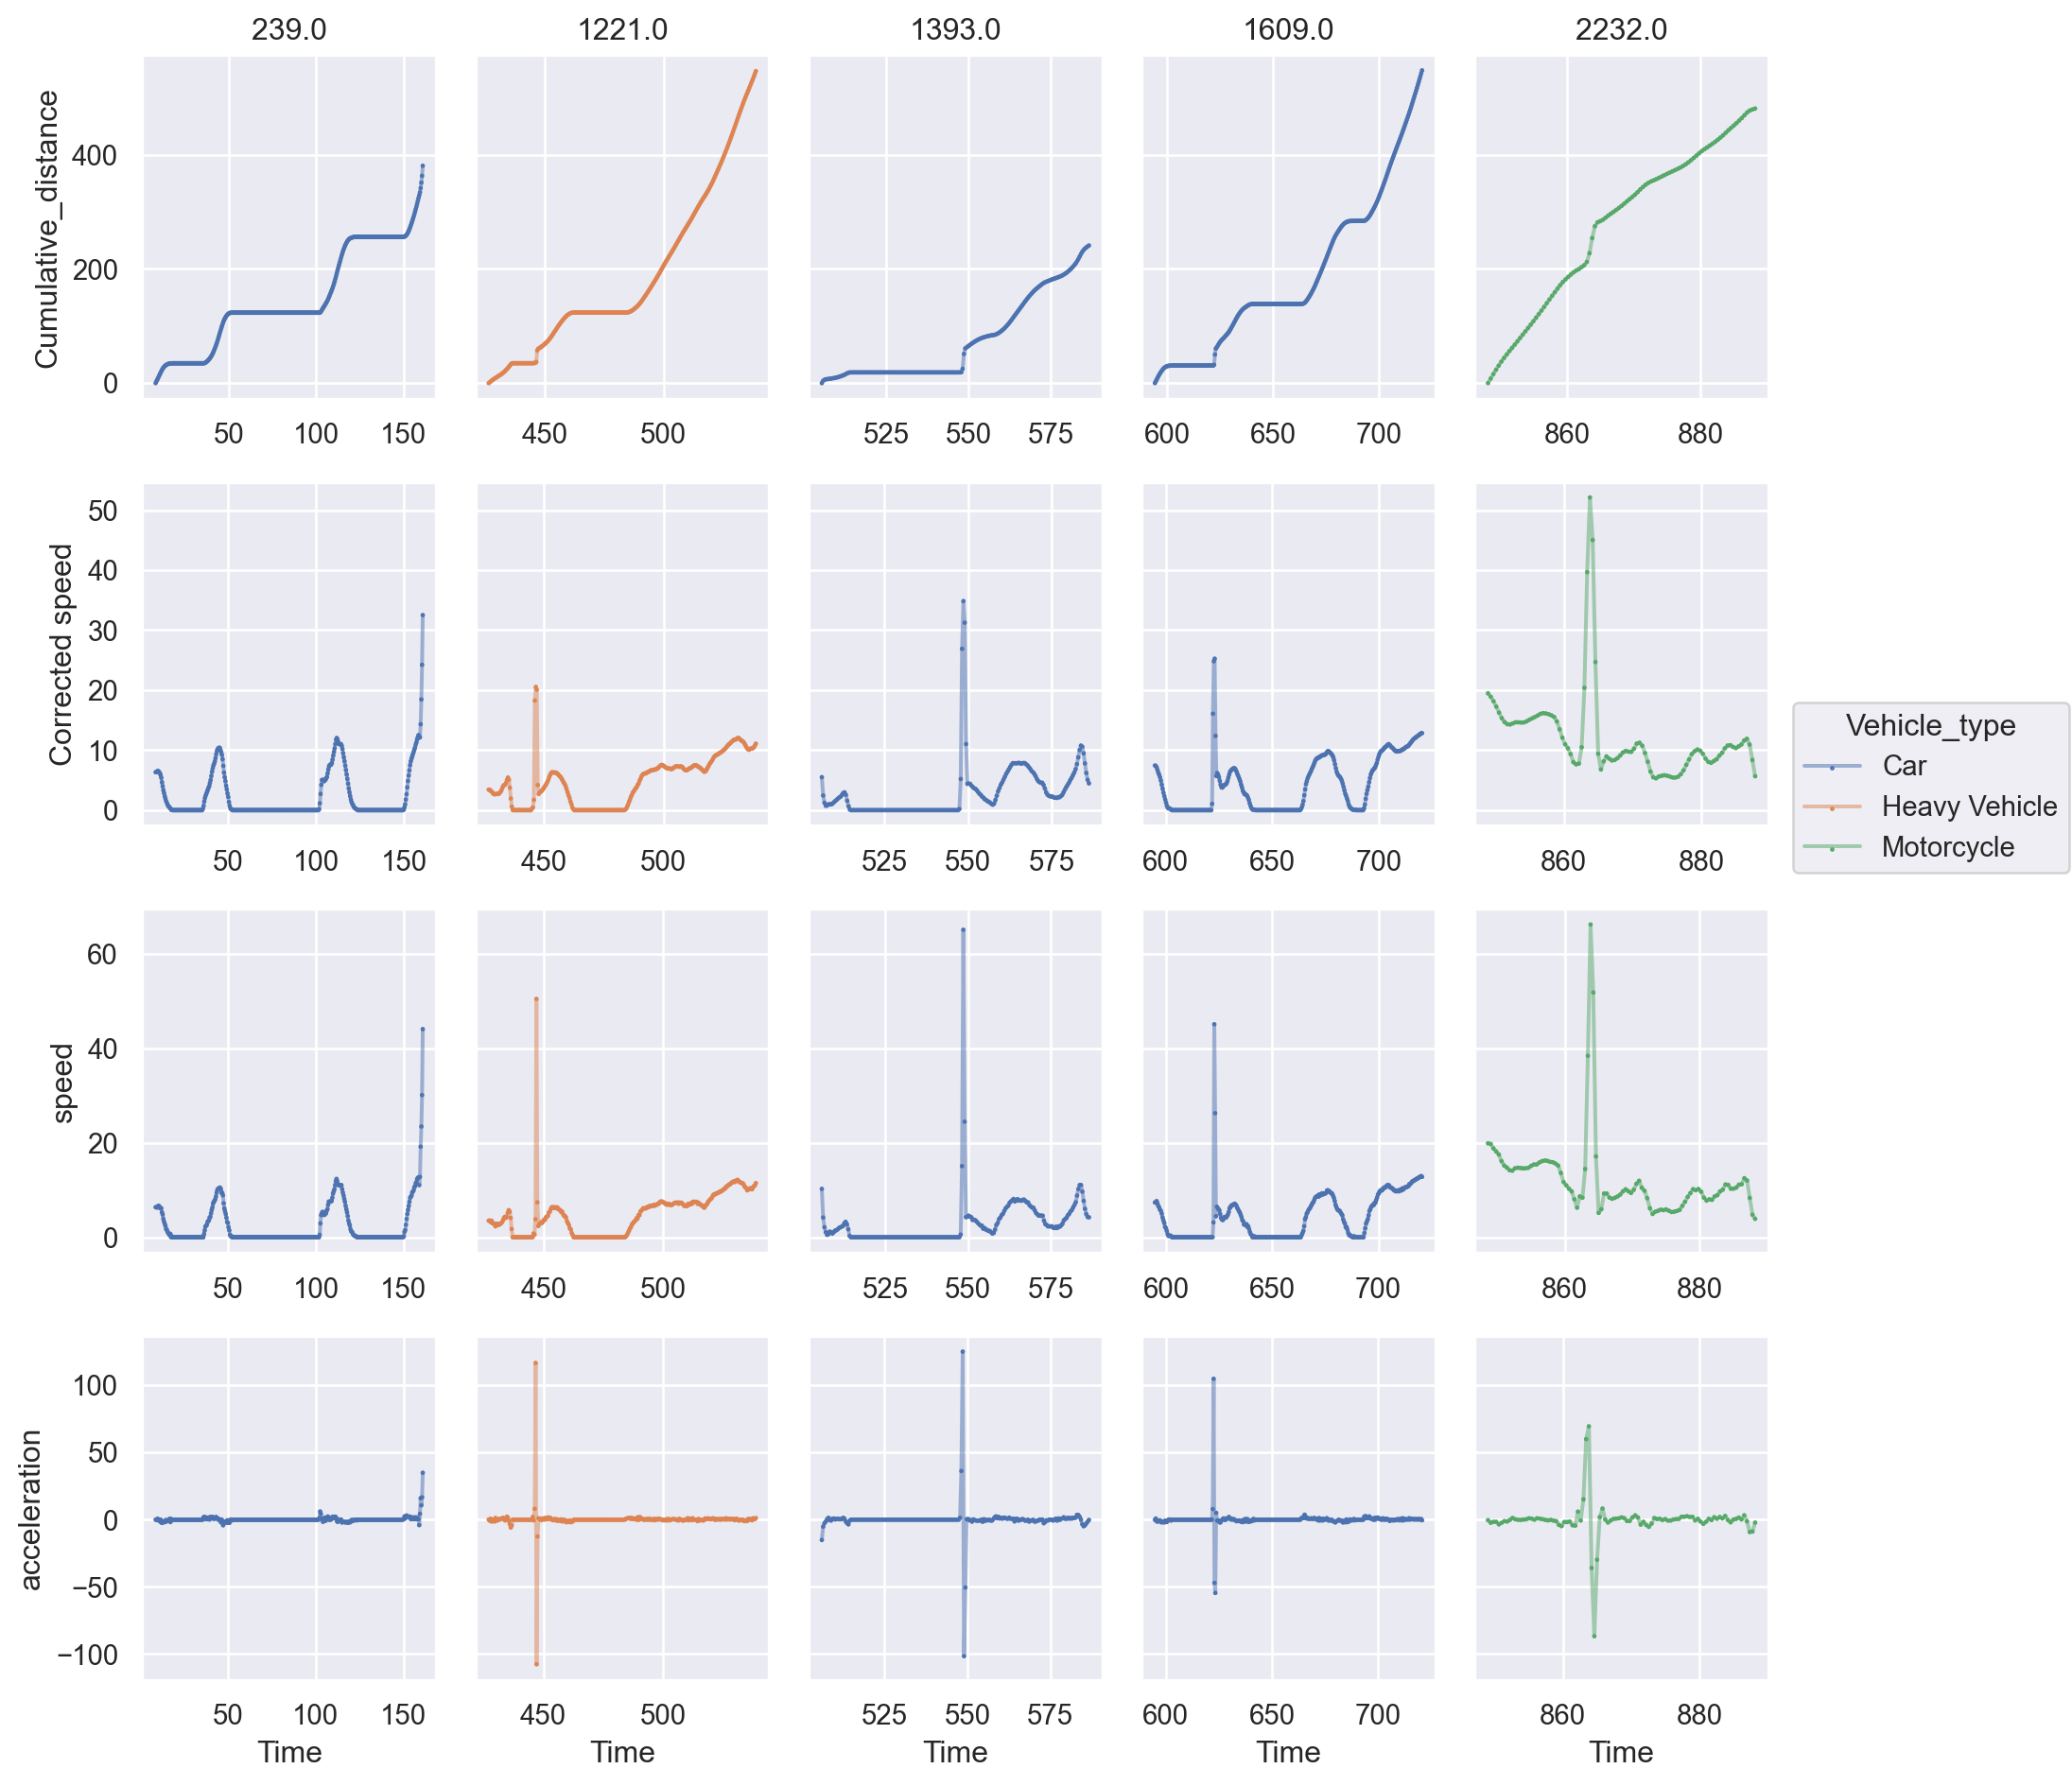

In [11]:
# Let's look at the data of some drivers with very high speeds
drivers = np.random.choice(df.loc[df.speed>150/3.6].Vehicle_ID.unique(), 5, replace = False)
(
    so.Plot(data=df.loc[df.Vehicle_ID.isin(drivers)], x="Time", color="Vehicle_type")
    .pair(y=["Cumulative_distance",speed_corrected,"speed", "acceleration"])
    .facet(col="Vehicle_ID")
    .add(so.Dots(pointsize=1))
    .add(so.Line(alpha=0.5))
    .share(x=False)
    .scale(color=so.Nominal())
    .layout(size=(10,10))
    .plot()
)

It seems like we have found some irregularities in the data. If we decide to look at every vehicles that has a max speed above 100 km/h :

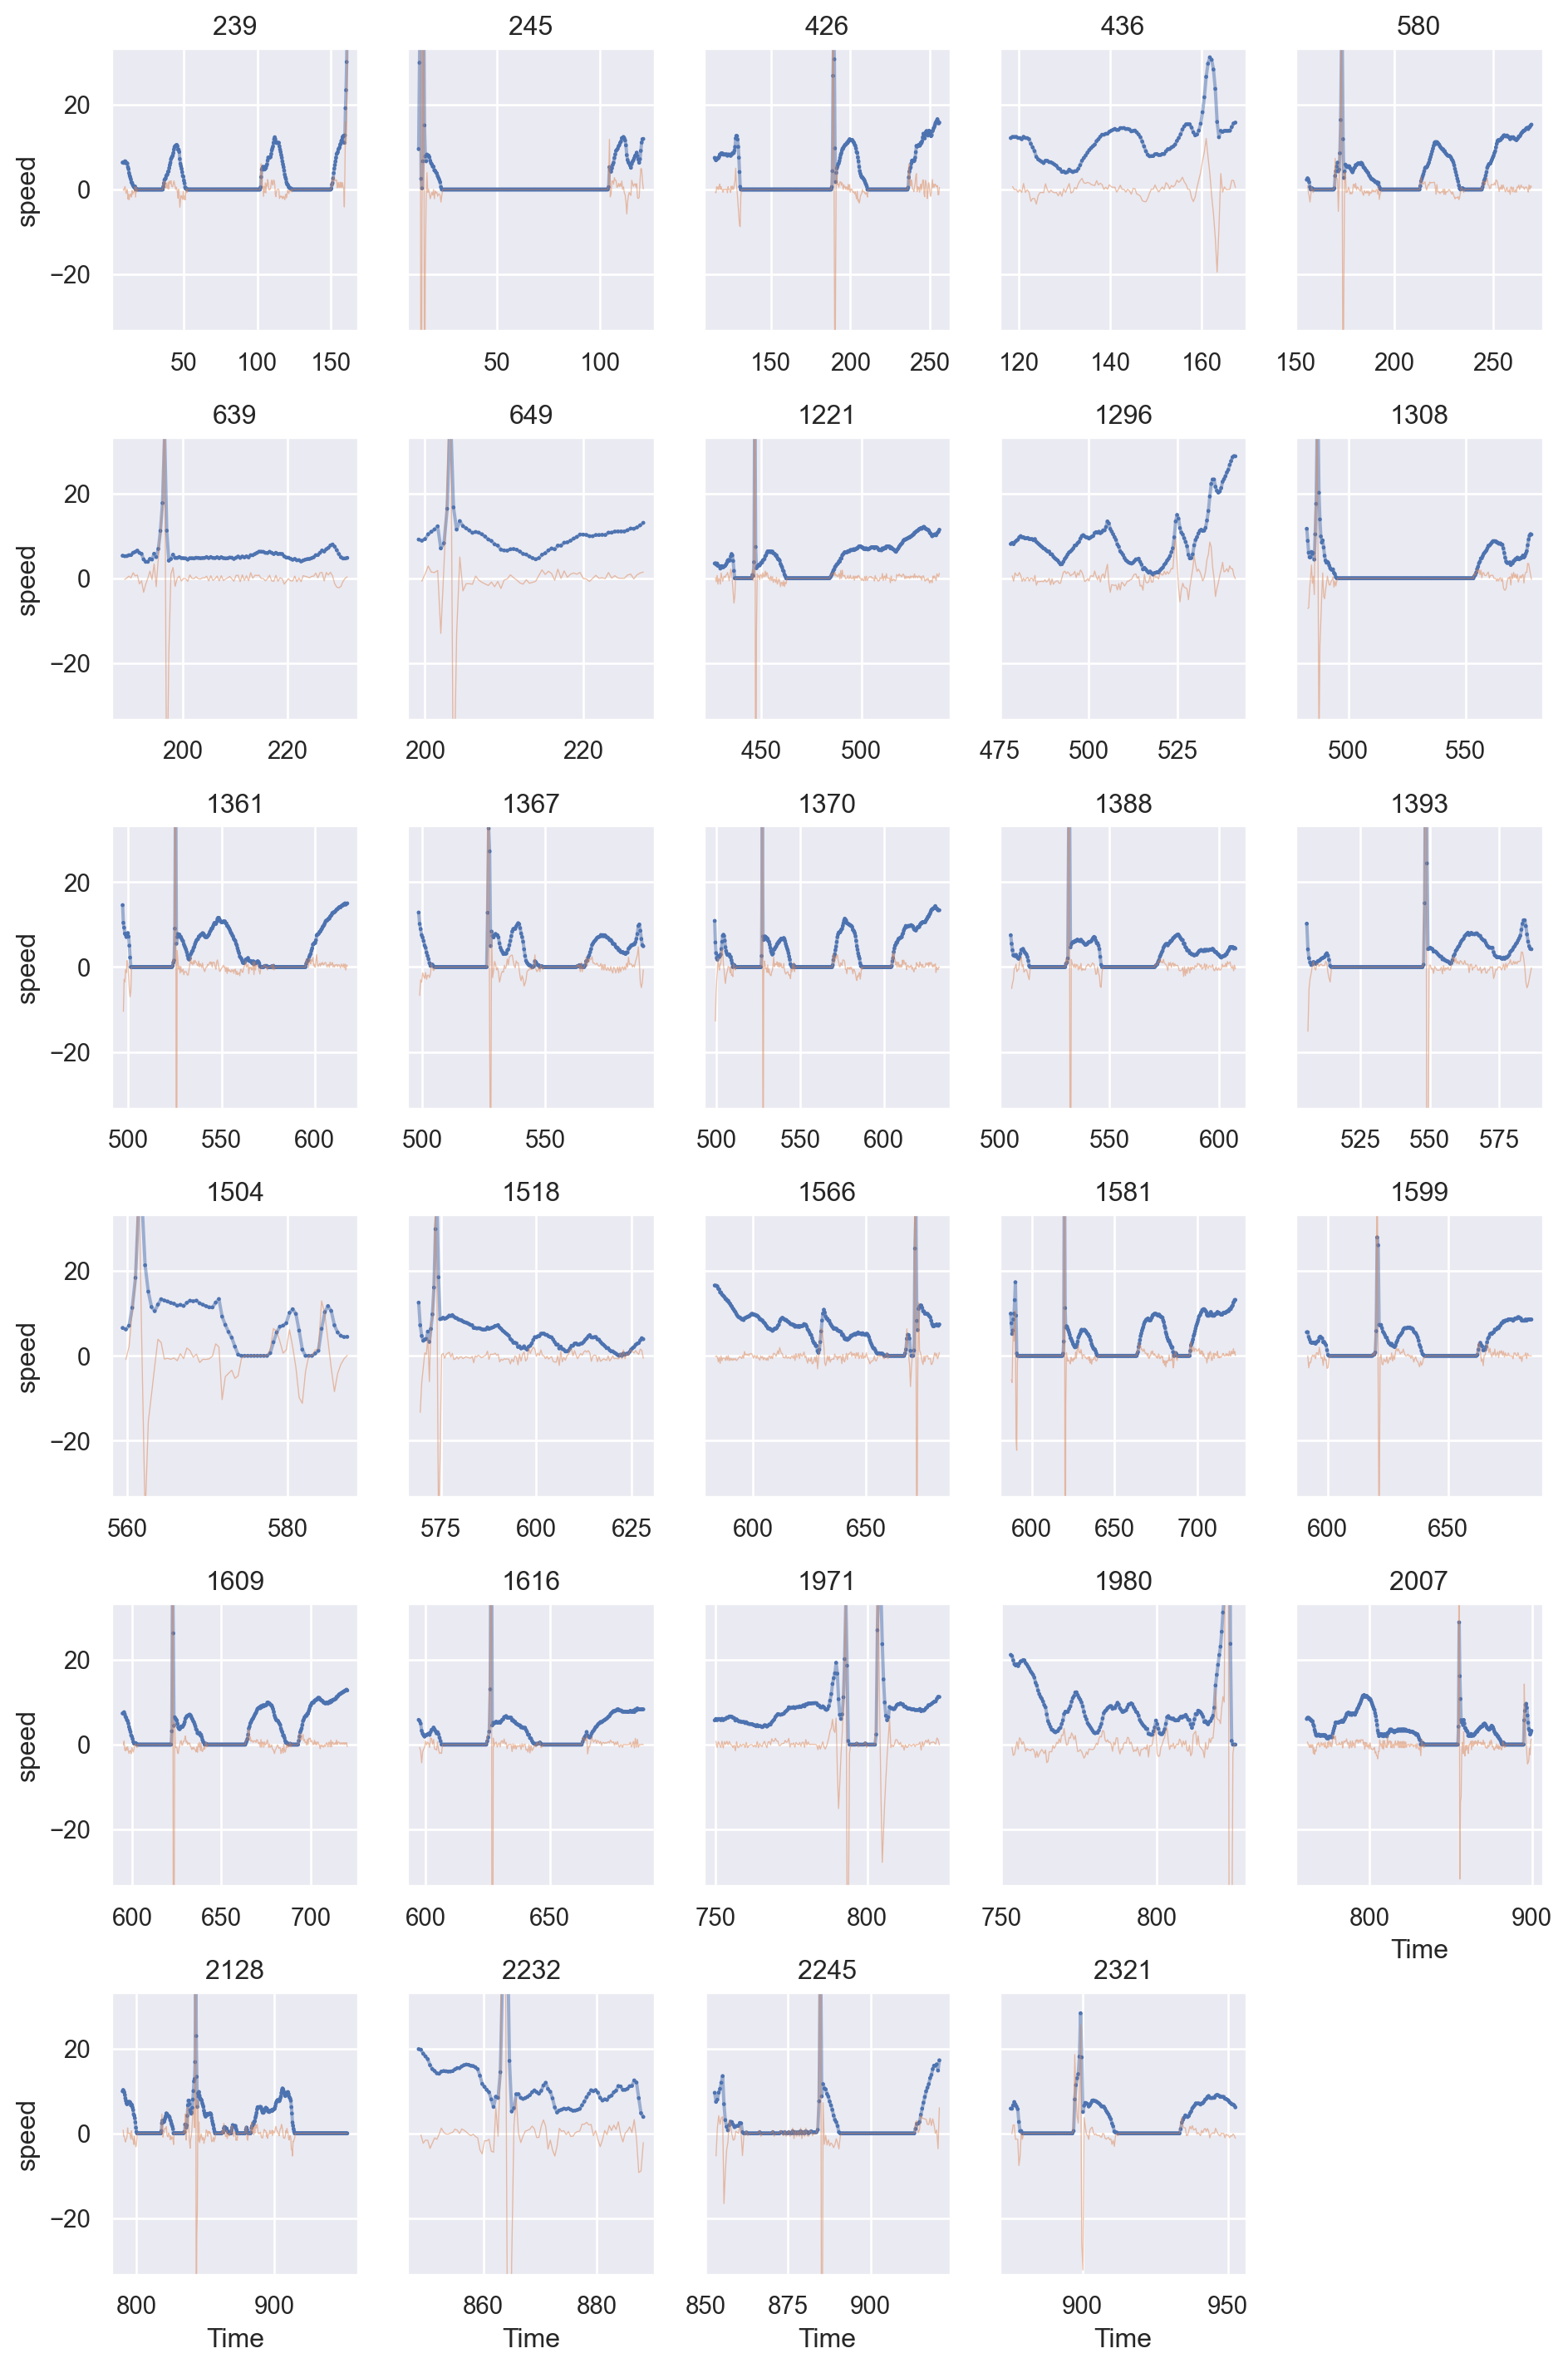

In [12]:
#Let's plot for those drivers to check if it does indeed corresponds to irregular data :
drivers = df.loc[df.speed>100/3.6].Vehicle_ID.unique()
(
    so.Plot(data=df.loc[df.Vehicle_ID.isin(drivers)], x="Time")
    .facet(col="Vehicle_ID", wrap=5)
    .add(so.Dots(pointsize=1), y="speed")
    .add(so.Line(alpha=0.5), y="speed")
    .add(so.Line(color="C1", alpha=0.5, linewidth=0.5), y="acceleration")
    .share(x=False)
    .scale(color=so.Nominal())
    .limit(y=(-120/3.6,120/3.6))
    .layout(size=(10,15))
    .plot()
)

It looks indeed like every vehicle in this dataset suffered data errors, except for the vehicles 436 and 1296, where the curves seems logical. We remove the vehicles with irregularities from the dataset :

In [13]:
drivers_to_delete = np.setdiff1d(drivers,[436, 1296])
drivers_to_delete

array([ 239,  245,  426,  580,  639,  649, 1221, 1308, 1361, 1367, 1370,
       1388, 1393, 1504, 1518, 1566, 1581, 1599, 1609, 1616, 1971, 1980,
       2007, 2128, 2232, 2245, 2321], dtype=int64)

In [14]:
mask = (1 - df.Vehicle_ID.isin(drivers_to_delete)).astype("bool")
df.loc[mask]

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance,distance,dt,speed,acceleration
0,1,Motorcycle,0.0,0.000,NaN,NaN,NaN,NaN
1,1,Motorcycle,0.4,0.000,0.000,0.4,0.0000,NaN
2,1,Motorcycle,0.8,0.000,0.000,0.4,0.0000,0.00000
3,1,Motorcycle,1.2,0.000,0.000,0.4,0.0000,0.00000
4,1,Motorcycle,1.6,0.000,0.000,0.4,0.0000,0.00000
...,...,...,...,...,...,...,...,...
580205,2476,Car,952.8,11.846,2.524,0.4,6.3100,-2.85625
580206,2477,Car,951.6,0.000,NaN,NaN,NaN,NaN
580207,2477,Car,952.0,3.387,3.387,0.4,8.4675,NaN
580208,2477,Car,952.4,6.944,3.557,0.4,8.8925,1.06250


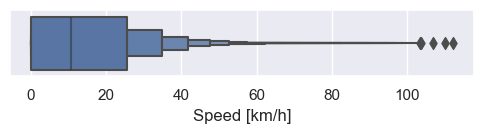

In [15]:
# Redo the speed boxplot in km/h, without the drivers with irregularities
plt.figure(figsize=(5,6/4), layout="tight")
sns.boxenplot(x=kmh(df.loc[mask, "speed"]))
plt.xlabel("Speed [km/h]")
plt.show()

In [43]:
#Compute the percentage of rows that would be deleted :
percentage_deleted = 1-mask.mean()
print(f"Percentage of rows that would be deleted : {percentage_deleted:.1%}")

Percentage of rows that would be deleted : 1.1%


Seems better !

In [26]:
#Let's make it permanent
if 239 in df.Vehicle_ID.values: #Check to only do it once
    print("Removing vehicles with irregular data from the dataframe")
    df = df.loc[mask].copy(deep=True)
else:
    print("Already done...")

Already done...


Now we can compute the operating mode :

In [29]:
# Compute opertating mode
df["mode"] = "IDLE"
df.loc[df.acceleration > 0.5, "mode"] = "ACC"
df.loc[df.acceleration < -0.5, "mode"] = "DEC"
df.loc[(df.speed > 0.28) * (abs(df.acceleration)<=0.5), "mode"] = "CRUISE"

display(df.tail(5))
df["mode"].value_counts()

,Vehicle_ID,Vehicle_type,Time,Cumulative_distance,distance,dt,speed,acceleration,mode
580205,2476,Car,952.8,11.846,2.524,0.4,6.3100,-2.85625,DEC
580206,2477,Car,951.6,0.000,NaN,NaN,NaN,NaN,IDLE
580207,2477,Car,952.0,3.387,3.387,0.4,8.4675,NaN,IDLE
580208,2477,Car,952.4,6.944,3.557,0.4,8.8925,1.06250,ACC
580209,2477,Car,952.8,10.897,3.953,0.4,9.8825,2.47500,ACC


mode
IDLE      226925
DEC       119147
CRUISE    116985
ACC       110630
Name: count, dtype: int64

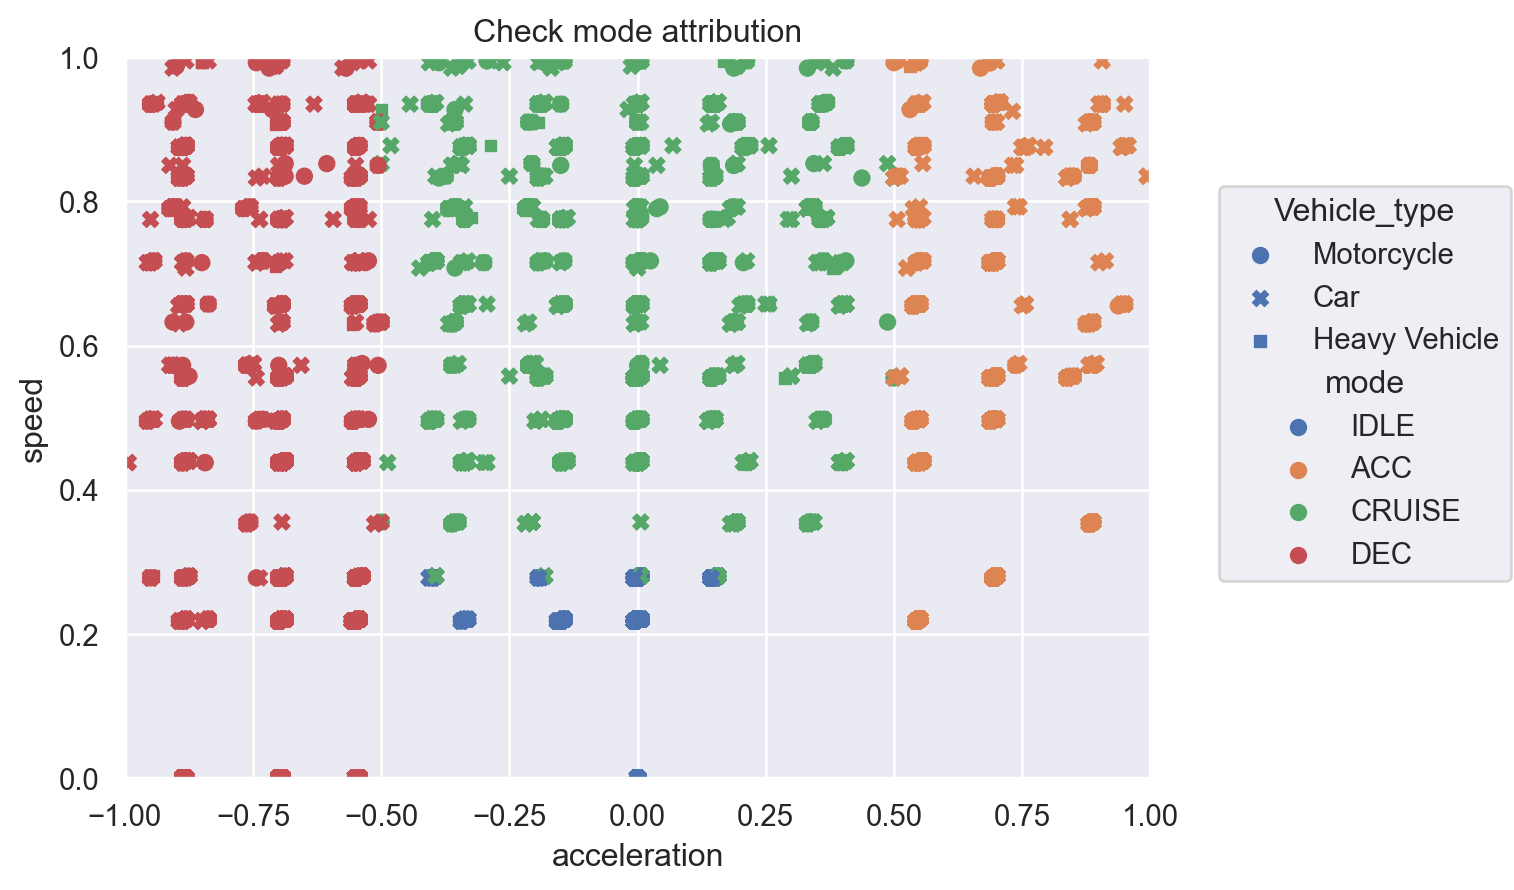

In [30]:
#Check mode attribution
(
    so.Plot(df, x="acceleration", y="speed", marker="Vehicle_type", color="mode")
    .add(so.Dot())
    .scale(color=so.Nominal())
    .limit(x=(-1,1), y=(0,1))
    .label(title="Check mode attribution")
    .save('Graphs/T1_check_modes.png')
    .plot()
)

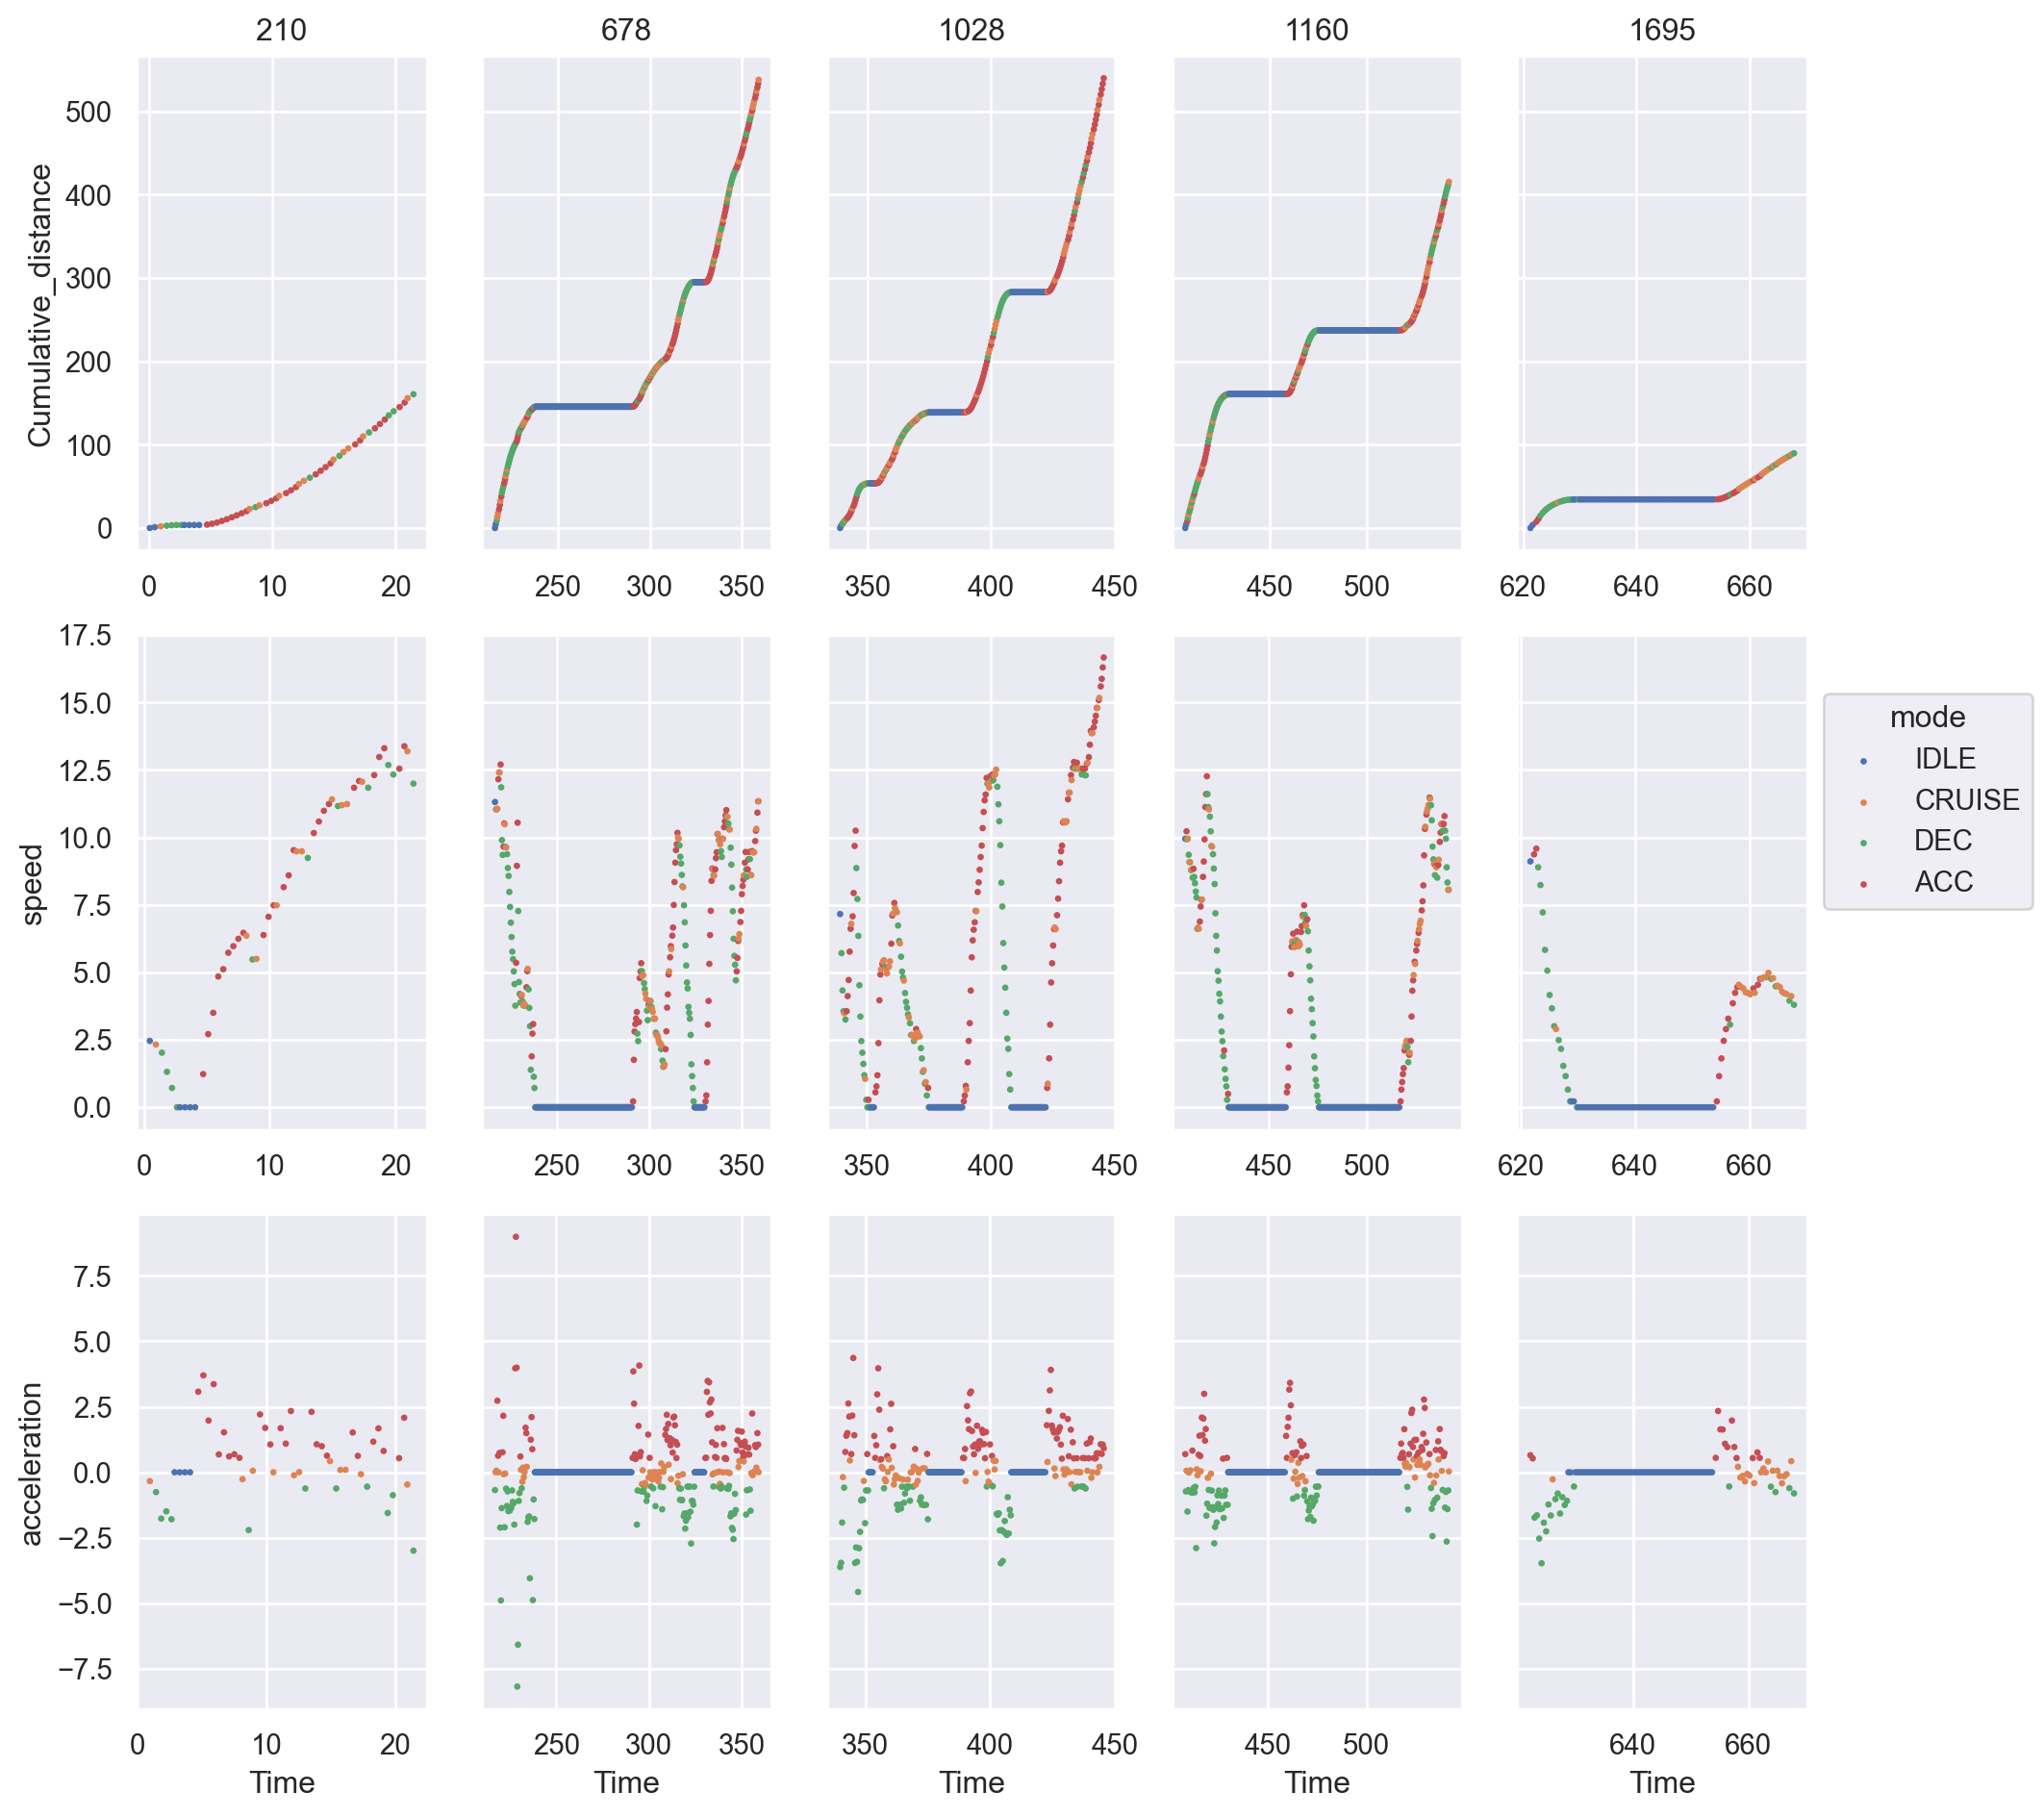

In [31]:
#Show sample of vehicles
sample = np.random.choice(df.Vehicle_ID.unique(),5)
(
    so.Plot(df.loc[df.Vehicle_ID.isin(sample)], x="Time", color="mode")
    .pair(y=["Cumulative_distance", "speed", "acceleration"])
    .facet(col="Vehicle_ID")
    .add(so.Dot(pointsize=2), so.Dodge())
    .scale(color=so.Nominal())
    .layout(size=(10,10))
    .share(x=False)
    .save('Graphs/T1_samples_of_mode.png')
    .plot()
)

Now we compute summary by type of vehicles :

In [33]:
# Compute the time spent in each mode for each type

grouped = df.groupby(by=["Vehicle_type", "mode"])
percentage_in_each_mode = grouped.dt.sum()/df.dt.sum()*100
percentage_in_each_mode.to_frame(name="Time spent in each mode [%]").unstack()

Time spent in each mode [%]                                 
mode                                  ACC     CRUISE        DEC       IDLE
Vehicle_type                                                              
Car                             13.387788  14.612849  14.228945  28.881708
Heavy Vehicle                    0.817874   1.117225   0.879670   2.394978
Motorcycle                       5.161080   4.749167   5.749102   8.019614

In [34]:
# Compute average speed for each type :
grouped = df.groupby(by="Vehicle_type")

average_speed_by_type = grouped.distance.sum() / grouped.dt.sum()
average_speed_by_type.to_frame("Average speed by type")

,Average speed by type
Vehicle_type,
Car,3.660078
Heavy Vehicle,2.885879
Motorcycle,5.255810


To finish, let's compute the average speed and time spent in each operating mode by vehicle (and add usefull data such as distance and time travelled):

In [35]:
# Start with generic data by vehicle :
df_by_ID = df.groupby("Vehicle_ID").agg(
    type = ("Vehicle_type", "first"),
    total_distance = ("distance", "sum"),
    time_travelled = ("dt", "sum")
)

# Compute vehicle average speed (total distance over time)
df_by_ID["average_speed"] = df_by_ID.total_distance / df_by_ID.time_travelled

# Compute time spent in each mode
time_spent = df.groupby(["Vehicle_ID", "mode"])["dt"].sum().unstack().rename(columns=lambda x : f"time_spent_{x}")

df_by_ID = pd.concat([df_by_ID, time_spent], axis=1)

df_by_ID

,type,total_distance,time_travelled,average_speed,time_spent_ACC,time_spent_CRUISE,time_spent_DEC,time_spent_IDLE
Vehicle_ID,,,,,,,,
1,Motorcycle,129.217,65.6,1.969771,10.8,6.8,3.2,44.8
2,Car,216.304,32.0,6.759500,11.2,9.2,8.8,2.8
3,Car,222.995,39.2,5.688648,12.0,16.8,10.0,0.4
4,Motorcycle,145.801,99.2,1.469768,10.4,6.4,8.4,74.0
5,Motorcycle,222.252,93.6,2.374487,12.0,2.4,2.8,76.4
...,...,...,...,...,...,...,...,...
2473,Car,14.715,2.0,7.357500,1.2,NaN,0.4,0.4
2474,Motorcycle,16.820,2.0,8.410000,NaN,0.8,0.8,0.4
2475,Motorcycle,22.705,2.0,11.352500,0.8,0.4,0.4,0.4


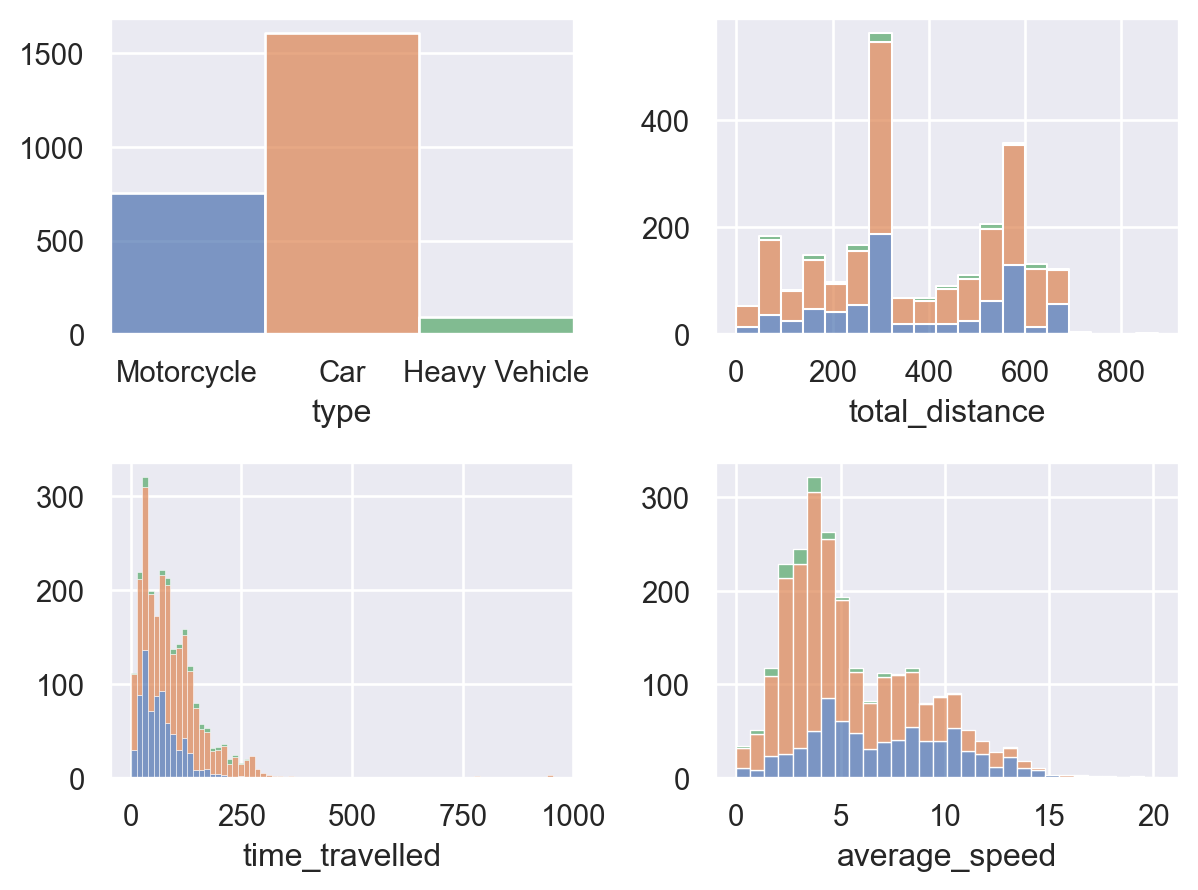

In [36]:
# Visualise the data
(
    so.Plot(data=df_by_ID, color="type")
    .pair(x=["type", "total_distance", "time_travelled","average_speed"], wrap=2)
    .add(so.Bars(), so.Hist(), so.Stack(), legend=False)
    .share(y=False)
    .plot()
)

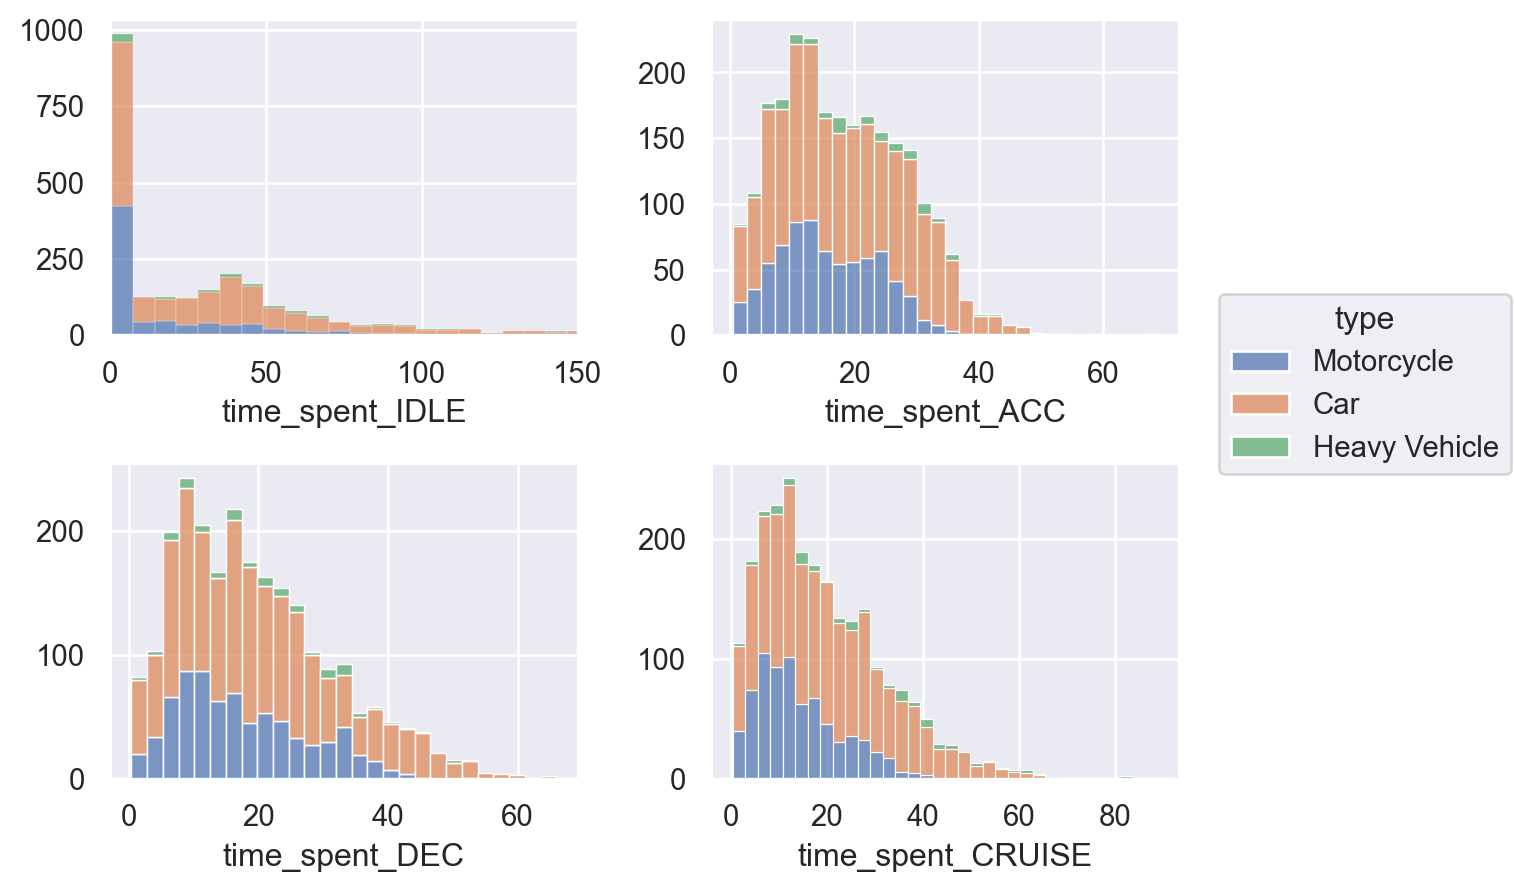

In [37]:
# Visualise the data (time spent in each mode)
(
    so.Plot(data=df_by_ID, color="type")
    .pair(x=["time_spent_IDLE","time_spent_ACC","time_spent_DEC","time_spent_CRUISE"], wrap = 2)
    .add(so.Bars(), so.Hist(), so.Stack())
    .limit(x0=[0, 150])
    .share(y=False)
    .plot()
)

## Step 2

In [47]:
emission = lambda v : 0.55 * (891 - 22.1360 * v + 0.2346 * v**2 -0.0007 * v**3)  # noqa: E731
kmh = lambda ms : 3.6 * ms  # noqa: E731

df["emission_rate_EMFAC"] = df.speed.apply(lambda x: emission(kmh(x)))
df.loc[df.emission_rate_EMFAC<=0] = np.NaN # do not count negative values (which happen for very high speeds)
df["emission_EMFAC"] = (df.emission_rate_EMFAC * df.distance/1000)
total_emission = df.emission_EMFAC.sum()
total_travelled = df.distance.sum() / 1000
average_emission = total_emission / total_travelled

print(f"The total CO2 emitted is : {total_emission / 1000:,.0f} kg CO2")
print(f"The total distance travelled is {total_travelled:,.0f} km, which makes for an average emission rate of {average_emission:,.0f} g/km")
display(df[["distance", "dt", "speed", "acceleration", "mode", "emission_rate_EMFAC", "emission_EMFAC"]])

The total CO2 emitted is : 221 kg CO2
The total distance travelled is 924 km, which makes for an average emission rate of 239 g/km


,distance,dt,speed,acceleration,mode,emission_rate_EMFAC,emission_EMFAC
0,NaN,NaN,NaN,NaN,IDLE,NaN,NaN
1,0.000,0.4,0.0000,NaN,IDLE,490.050000,0.000000
2,0.000,0.4,0.0000,0.00000,IDLE,490.050000,0.000000
3,0.000,0.4,0.0000,0.00000,IDLE,490.050000,0.000000
4,0.000,0.4,0.0000,0.00000,IDLE,490.050000,0.000000
...,...,...,...,...,...,...,...
580205,2.524,0.4,6.3100,-2.85625,DEC,275.555966,0.695503
580206,NaN,NaN,NaN,NaN,IDLE,NaN,NaN
580207,3.387,0.4,8.4675,NaN,IDLE,227.916757,0.771954
580208,3.557,0.4,8.8925,1.06250,ACC,219.901161,0.782188


c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

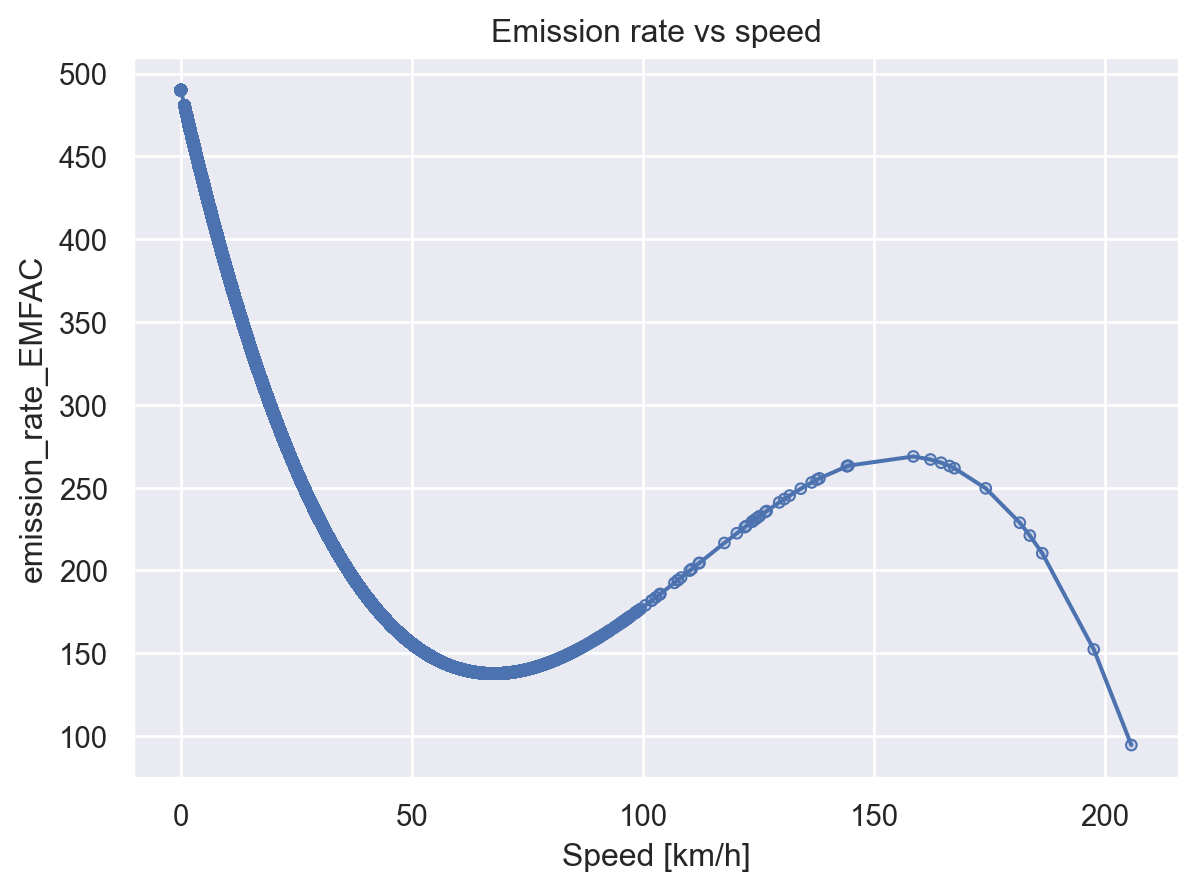

In [48]:
(
    so.Plot(data=df, x=kmh(df["speed"]), y="emission_rate_EMFAC")
    .add(so.Line())
    .add(so.Dots())
    .label(x="Speed [km/h]", title="Emission rate vs speed")
    .save("Graphs//T2_emission_rate_speed.png")
    .plot()
)

## Step 3

In [49]:
df["emission_rate_Modal"] = df["mode"].map({"IDLE":0.7, "ACC": 2.8, "DEC": 1.4, "CRUISE": 1.8}) * df.Vehicle_type.map({"Car": 1, "Motorcycle" : 0.5, "Heavy Vehicle":5})
 
df["emission_Modal"] = (df.emission_rate_Modal * df.dt)
total_emission = df.emission_Modal.sum()
total_travel_time = df.dt.sum()
average_emission = total_emission / total_travelled

print(f"The total CO2 emitted is : {total_emission / 1000:,.0f} kg CO2")
print(f"The total travel time is {total_travel_time:,.0f} s ({total_travel_time/3600:.1f} h), which makes for an average emission rate of {average_emission:,.0f} g/s")
display(df[["distance", "dt", "speed", "acceleration", "mode", "emission_EMFAC", "emission_rate_Modal", "emission_Modal"]])

The total CO2 emitted is : 366 kg CO2
The total travel time is 231,091 s (64.2 h), which makes for an average emission rate of 396 g/s


,distance,dt,speed,acceleration,mode,emission_EMFAC,emission_rate_Modal,emission_Modal
0,NaN,NaN,NaN,NaN,IDLE,NaN,0.35,NaN
1,0.000,0.4,0.0000,NaN,IDLE,0.000000,0.35,0.14
2,0.000,0.4,0.0000,0.00000,IDLE,0.000000,0.35,0.14
3,0.000,0.4,0.0000,0.00000,IDLE,0.000000,0.35,0.14
4,0.000,0.4,0.0000,0.00000,IDLE,0.000000,0.35,0.14
...,...,...,...,...,...,...,...,...
580205,2.524,0.4,6.3100,-2.85625,DEC,0.695503,1.40,0.56
580206,NaN,NaN,NaN,NaN,IDLE,NaN,0.70,NaN
580207,3.387,0.4,8.4675,NaN,IDLE,0.771954,0.70,0.28
580208,3.557,0.4,8.8925,1.06250,ACC,0.782188,2.80,1.12


In [50]:
#Sanity check
sanity_check = pd.DataFrame(df.groupby("Vehicle_type")["dt"].sum().rename("Total travel time [s]"))
sanity_check["Total emissions [g CO2]"] = (df.emission_Modal).groupby(df.Vehicle_type).sum()
sanity_check["Average emissions [g/s]"] = sanity_check["Total emissions [g CO2]"]/sanity_check["Total travel time [s]"]

display(sanity_check)


,Total travel time [s],Total emissions [g CO2],Average emissions [g/s]
Vehicle_type,,,
Car,164051.6,239756.40,1.461469
Heavy Vehicle,12059.6,83747.60,6.944476
Motorcycle,54979.6,42567.18,0.774236


## Step 4

In [51]:
VSP = lambda v, a : 0.278 * kmh(v) * (0.305 * kmh(a) + 0.132) + 0.0000065 * kmh(v)**2  # noqa: E731

df["VSP"] = df[["speed", "acceleration"]].apply(axis=1, func=lambda x: VSP(x.speed, x.acceleration))
df["VSP_mode"] = 14
df.loc[df.VSP < 39, "VSP_mode"] = 13
df.loc[df.VSP < 33, "VSP_mode"] = 12
df.loc[df.VSP < 28, "VSP_mode"] = 11
df.loc[df.VSP < 23, "VSP_mode"] = 10
df.loc[df.VSP < 19, "VSP_mode"] = 9
df.loc[df.VSP < 16, "VSP_mode"] = 8
df.loc[df.VSP < 13, "VSP_mode"] = 7
df.loc[df.VSP < 10, "VSP_mode"] = 6
df.loc[df.VSP < 7, "VSP_mode"] = 5
df.loc[df.VSP < 4, "VSP_mode"] = 4
df.loc[df.VSP < 1, "VSP_mode"] = 3
df.loc[df.VSP < 0, "VSP_mode"] = 2
df.loc[df.VSP < -2, "VSP_mode"] = 1


df[["speed", "acceleration","VSP", "VSP_mode"]]

,speed,acceleration,VSP,VSP_mode
0,NaN,NaN,NaN,14
1,0.0000,NaN,NaN,14
2,0.0000,0.00000,0.000000,3
3,0.0000,0.00000,0.000000,3
4,0.0000,0.00000,0.000000,3
...,...,...,...,...
580205,6.3100,-2.85625,-18.968076,1
580206,NaN,NaN,NaN,14
580207,8.4675,NaN,NaN,14
580208,8.8925,1.06250,11.563923,7


c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

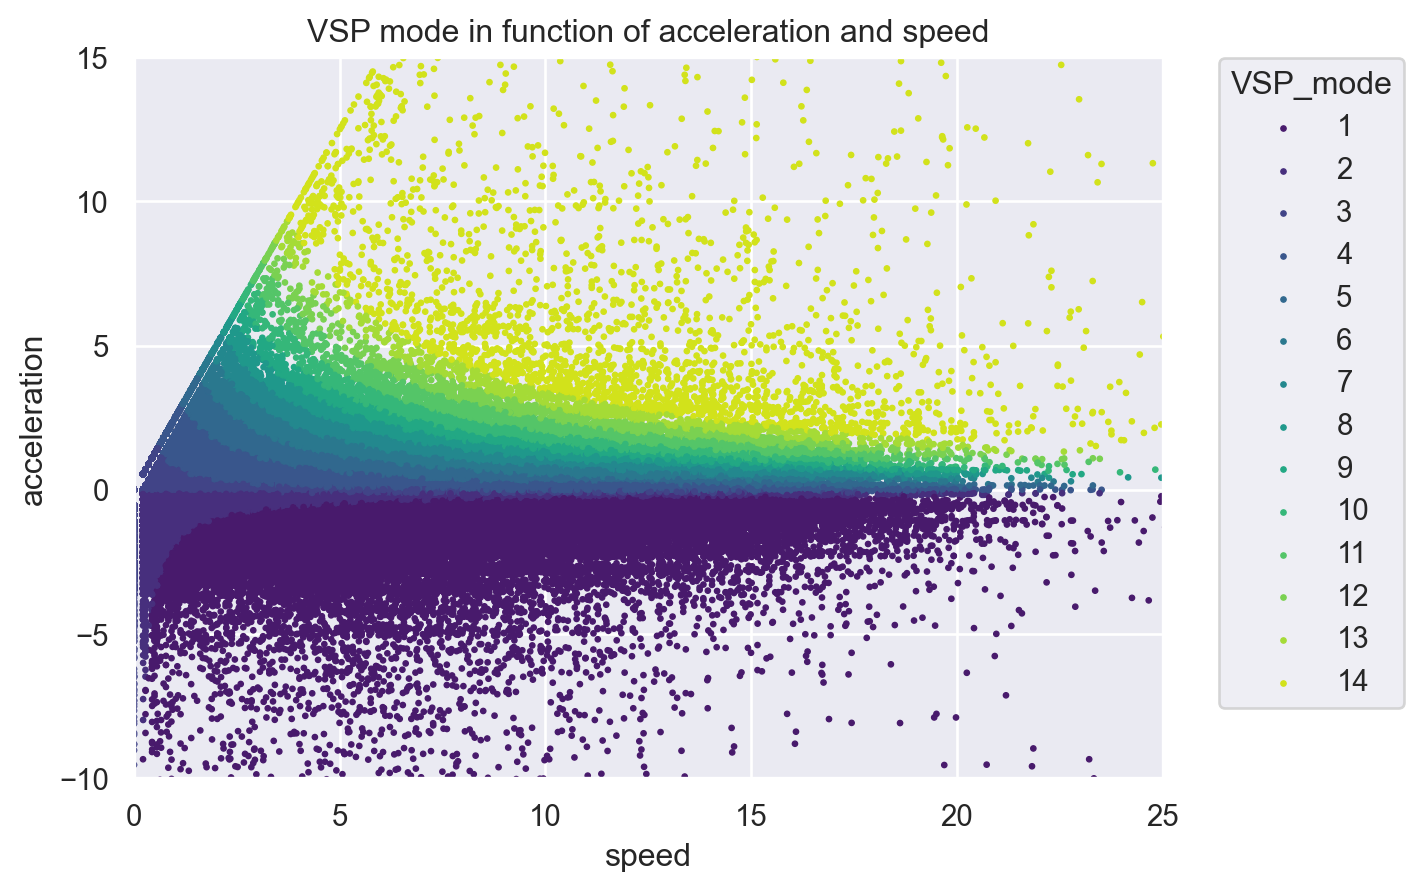

In [52]:
(
    so.Plot(data=df, x="speed", y="acceleration", color="VSP_mode")
    .add(so.Dot(pointsize=2))
    .scale(color=so.Nominal("viridis"))
    .limit(y=(-10,15), x=(0, 25))
    .label(title="VSP mode in function of acceleration and speed")
    .save("Graphs/T4_VSP_mode_speed_acceleration")
    .plot()
)

In [53]:
#Computing emissions

df["emission_rate_VSP"] = df.VSP_mode.map({
    1:1.30,
    2:1.43,
    3:0.97,
    4:2.03,
    5:2.74,
    6:3.42,
    7:4.02,
    8:4.56,
    9:5.08,
    10:5.61,
    11:6.05,
    12:6.41,
    13:6.86,
    14:7.41
}) * df.Vehicle_type.map({"Car": 1, "Motorcycle" : 0.5, "Heavy Vehicle":5})

df["emission_VSP"] = df.emission_rate_VSP * df.dt


total_emission = df.emission_VSP.sum()
average_emission = total_emission / total_travelled

print(f"The total CO2 emitted is : {total_emission / 1000:,.0f} kg CO2")
print(f"The total travel time is {total_travel_time:,.0f} s ({total_travel_time/3600:.1f} h), which makes for an average emission rate of {average_emission:,.0f} g/s")
display(df[["distance", "dt", "speed", "acceleration", "mode", "emission_EMFAC", "emission_Modal", "emission_rate_VSP", "emission_VSP"]])

The total CO2 emitted is : 407 kg CO2
The total travel time is 231,091 s (64.2 h), which makes for an average emission rate of 440 g/s


,distance,dt,speed,acceleration,mode,emission_EMFAC,emission_Modal,emission_rate_VSP,emission_VSP
0,NaN,NaN,NaN,NaN,IDLE,NaN,NaN,3.705,NaN
1,0.000,0.4,0.0000,NaN,IDLE,0.000000,0.14,3.705,1.482
2,0.000,0.4,0.0000,0.00000,IDLE,0.000000,0.14,0.485,0.194
3,0.000,0.4,0.0000,0.00000,IDLE,0.000000,0.14,0.485,0.194
4,0.000,0.4,0.0000,0.00000,IDLE,0.000000,0.14,0.485,0.194
...,...,...,...,...,...,...,...,...,...
580205,2.524,0.4,6.3100,-2.85625,DEC,0.695503,0.56,1.300,0.520
580206,NaN,NaN,NaN,NaN,IDLE,NaN,NaN,7.410,NaN
580207,3.387,0.4,8.4675,NaN,IDLE,0.771954,0.28,7.410,2.964
580208,3.557,0.4,8.8925,1.06250,ACC,0.782188,1.12,4.020,1.608


In [54]:
#Sanity check
sanity_check = pd.DataFrame(df.groupby("Vehicle_type")["dt"].sum().rename("Total travel time [s]"))
sanity_check["Total emissions [g CO2]"] = (df.emission_VSP).groupby(df.Vehicle_type).sum()
sanity_check["Average emissions [g/s]"] = sanity_check["Total emissions [g CO2]"]/sanity_check["Total travel time [s]"]

display(sanity_check)


,Total travel time [s],Total emissions [g CO2],Average emissions [g/s]
Vehicle_type,,,
Car,164051.6,265530.208,1.618577
Heavy Vehicle,12059.6,89443.780,7.416812
Motorcycle,54979.6,51929.458,0.944522


## Step 5

In [60]:
df["is_aggressive"] = abs(df.acceleration) > 0.5
driver_aggressiveness = (df.is_aggressive * df.dt).groupby(df["Vehicle_ID"]).sum() / df.groupby("Vehicle_ID")["dt"].sum()

driver_behaviour = pd.Series(index=driver_aggressiveness.index, dtype=str)
driver_behaviour[:] = "Standard"
driver_behaviour.loc[driver_aggressiveness<0.3] = "Smooth"
driver_behaviour.loc[driver_aggressiveness>0.6] = "Aggressive"

display(driver_behaviour.value_counts())  # noqa: F821

Standard      1549
Aggressive     663
Smooth         265
Name: count, dtype: int64

In [61]:
#Link driver behaviour to the df and compute emissions by driver
df["driver_behaviour"] = df.Vehicle_ID.map(driver_behaviour)
df["driver_aggressiveness"] = df.Vehicle_ID.map(driver_aggressiveness)
df_cars = df.loc[df.Vehicle_type == "Car"]

by_driver_behaviour = df_cars.groupby("driver_behaviour")[["dt","distance", "emission_Modal"]].sum().rename(columns={"dt" : "Total time travelled [s]", "distance":"Total distance travelled [m]", "emission_Modal":"Total emissions [g CO2]"})
by_driver_behaviour["Number of drivers"] = driver_behaviour.value_counts()
by_driver_behaviour["mean emission rate [g/s]"] = by_driver_behaviour["Total emissions [g CO2]"] / by_driver_behaviour["Total time travelled [s]"]
by_driver_behaviour["mean emission rate [g/km]"] = by_driver_behaviour["Total emissions [g CO2]"] / by_driver_behaviour["Total distance travelled [m]"] * 1e3

shares = by_driver_behaviour / by_driver_behaviour.sum(axis=0)
display(by_driver_behaviour)
display(shares)

,Total time travelled [s],Total distance travelled [m],Total emissions [g CO2],Number of drivers,mean emission rate [g/s],mean emission rate [g/km]
driver_behaviour,,,,,,
Aggressive,11155.2,84370.325,21918.08,663,1.964831,259.784231
Smooth,33635.2,55524.693,36470.96,265,1.084309,656.842173
Standard,119261.2,460188.966,181367.36,1549,1.520757,394.114969


,Total time travelled [s],Total distance travelled [m],Total emissions [g CO2],Number of drivers,mean emission rate [g/s],mean emission rate [g/km]
driver_behaviour,,,,,,
Aggressive,0.067998,0.140598,0.091418,0.267662,0.429951,0.198196
Smooth,0.205028,0.092528,0.152117,0.106984,0.237272,0.501123
Standard,0.726974,0.766874,0.756465,0.625353,0.332777,0.300681


In [62]:
shares_unstack = shares.unstack().reset_index().rename(columns={"level_0":"Variable", 0:"Share"})
shares_unstack

,Variable,driver_behaviour,Share
0,Total time travelled [s],Aggressive,0.067998
1,Total time travelled [s],Smooth,0.205028
2,Total time travelled [s],Standard,0.726974
3,Total distance travelled [m],Aggressive,0.140598
4,Total distance travelled [m],Smooth,0.092528
5,Total distance travelled [m],Standard,0.766874
6,Total emissions [g CO2],Aggressive,0.091418
7,Total emissions [g CO2],Smooth,0.152117
8,Total emissions [g CO2],Standard,0.756465
9,Number of drivers,Aggressive,0.267662


c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

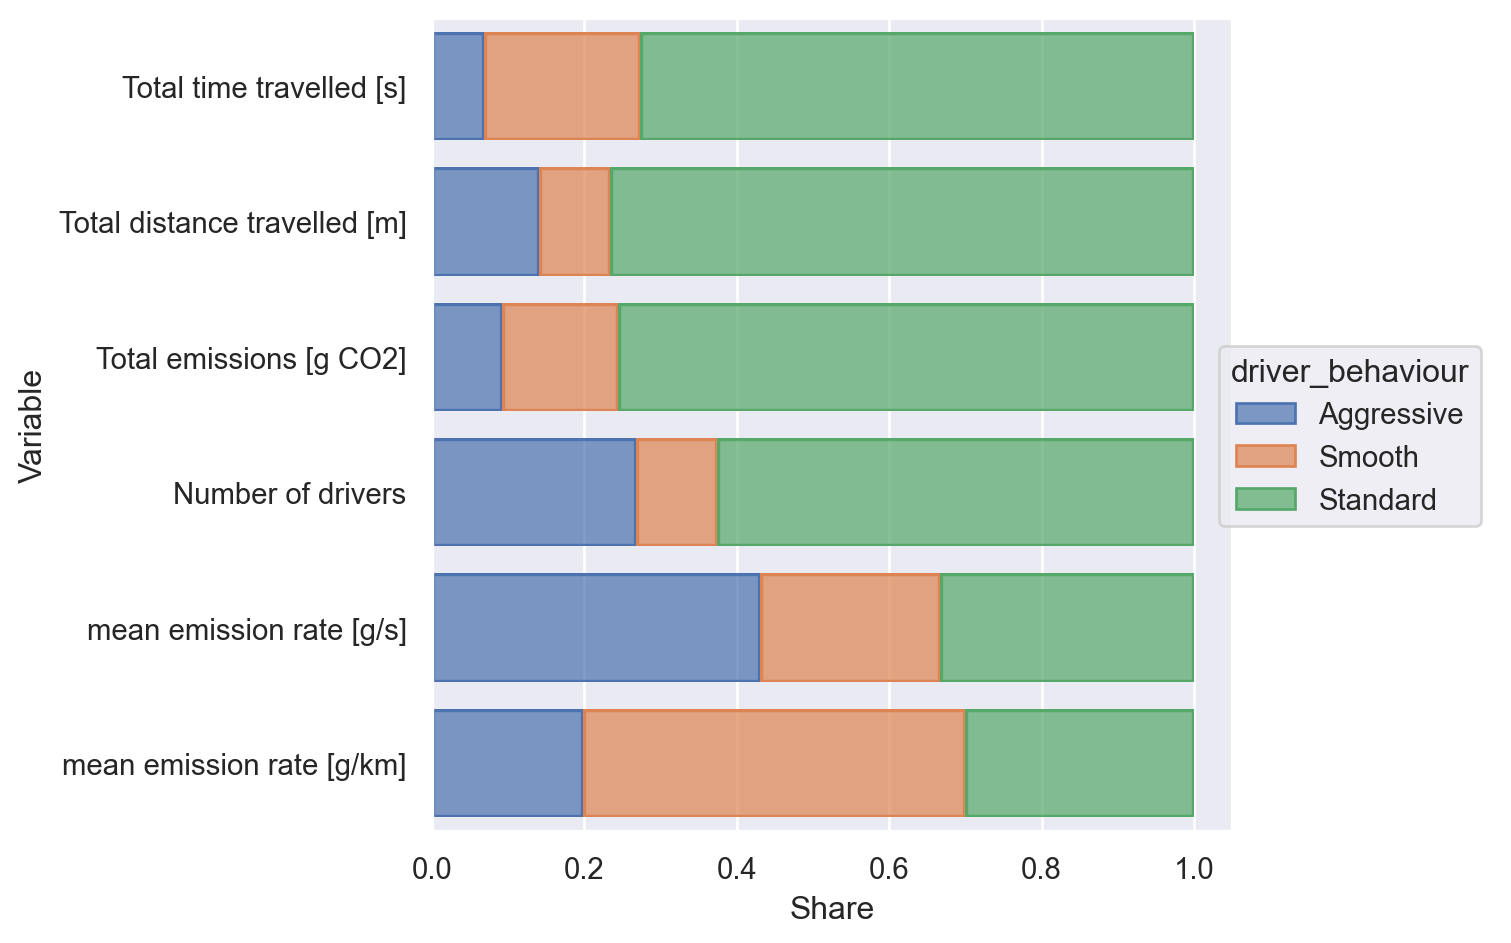

In [67]:
(
    so.Plot(data=shares_unstack, y="Variable", x="Share", color="driver_behaviour")
    .add(so.Bar(), so.Stack(), orient="y")
    .layout(engine="constrained")
    .save("Graphs/T5_Shares")
    .plot()
)

c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

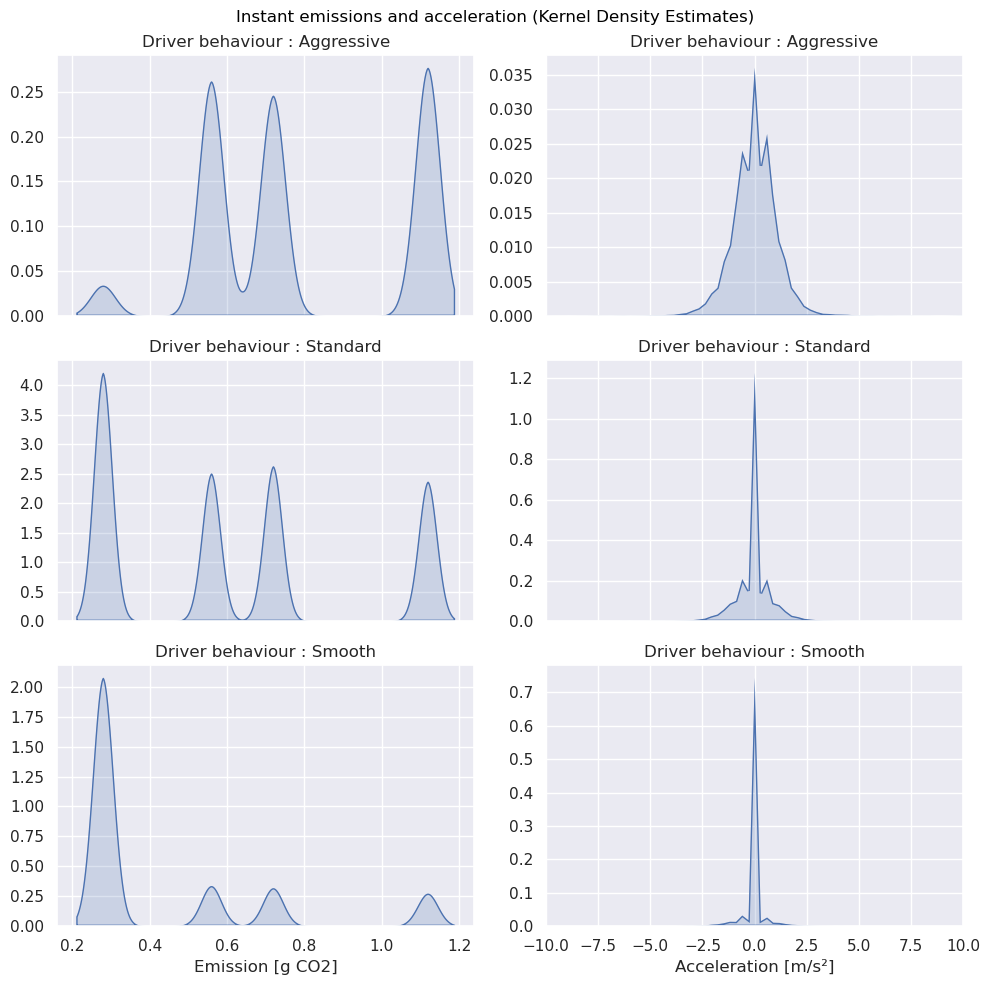

In [110]:
(
    so.Plot(data=df_cars)
    .pair(x=["emission_Modal", "acceleration"])
    .facet(row="driver_behaviour")
    .limit(x1=[-10,10])
    .add(so.Area(), so.KDE(gridsize=1000))
    .layout(size=(10,10))
    .share(y=False)
    .label(row="Driver behaviour :", x0="Emission [g CO2]", x1="Acceleration [m/s²]")
    .plot(pyplot=True)
)
plt.suptitle("Instant emissions and acceleration (Kernel Density Estimates)")
plt.savefig("Graphs/T5_Emission_distribution_by_driver_behaviour.png")
plt.show()

,distance,speed,acceleration,emission_rate_Modal,emission_Modal,driver_behaviour,driver_aggressiveness
Vehicle_ID,,,,,,,
2.0,216.304,6.759500,0.195886,1.928395,62.20,Aggressive,0.625000
3.0,222.995,5.688648,0.116753,1.979798,78.12,Standard,0.561224
9.0,160.847,1.506058,0.046781,1.091791,116.76,Smooth,0.205993
12.0,190.225,1.704525,-0.033026,1.110357,124.08,Smooth,0.182796
13.0,187.943,1.637134,-0.006031,1.204861,138.52,Smooth,0.222997
...,...,...,...,...,...,...,...
2469.0,26.063,8.144688,0.268750,1.844444,6.36,Standard,0.500000
2472.0,19.944,9.972000,-2.020312,1.400000,3.08,Aggressive,0.800000
2473.0,14.715,7.357500,3.846875,1.866667,4.20,Aggressive,0.800000


c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arsju\anaconda3\envs\FTOC.venv\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

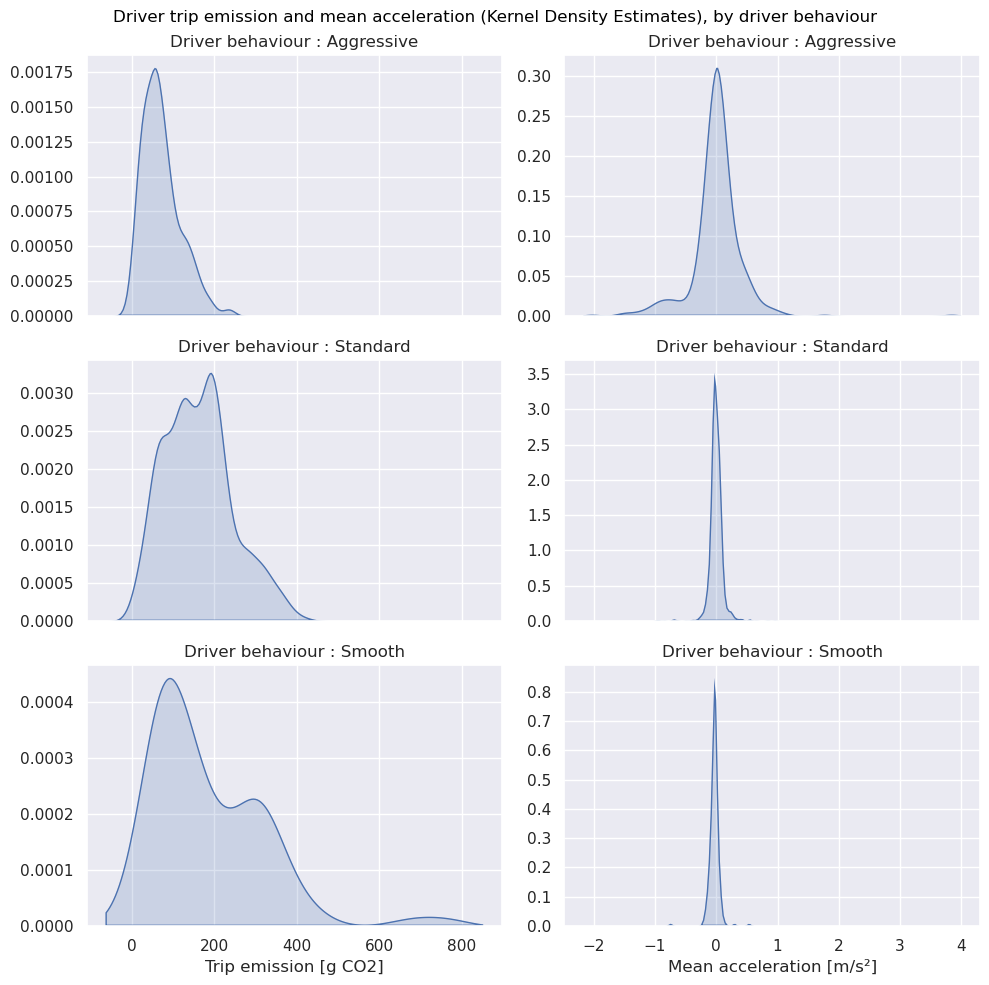

In [111]:
df_cars_by_car = df_cars.groupby(by="Vehicle_ID").agg(dict(
    distance = "sum",
    speed = "mean",
    acceleration = "mean",
    emission_rate_Modal="mean",
    emission_Modal="sum",
    driver_behaviour="first",
    driver_aggressiveness="mean"
))
display(df_cars_by_car)
p=(
    so.Plot(data=df_cars_by_car)
    .pair(x=["emission_Modal", "acceleration"])
    .facet(row="driver_behaviour")
    .add(so.Area(), so.KDE())
    .layout(size=(10,10))
    .share(y=False)
    .label(row="Driver behaviour :", x0="Trip emission [g CO2]", x1="Mean acceleration [m/s²]")
    .plot(pyplot=True)
)
plt.suptitle("Driver trip emission and mean acceleration (Kernel Density Estimates), by driver behaviour")
plt.savefig("Graphs/T5_Emission_distribution_by_driver_behaviour_grouped.png")
plt.show()